In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/DNN/stock.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float32)
# 정규화
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))

print(data.shape)
print(len(data) * 0.8)    # 데이터 나누기 위해서

(9288, 5)
7430.400000000001


In [ ]:
# 데이터셋 만들기(주의 : 다음날 예측입니다)
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]              # 라벨(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)

(9287, 5)
(9287,)


In [ ]:
# 데이터 셋 만들기
x_train = x_data[ : 7430 ,  : ]         # 학습 데이터
y_train = y_data[ : 7430]

x_test = x_data[7431 : ,  : ]          # 테스트 데이터
y_test = y_data[7431 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7430, 5)
(7430,)
(1856, 5)
(1856,)


In [ ]:
model=Sequential()
model.add(Dense(128, input_dim = 5, kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))     # Dropout : 50%
model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))     # Dropout : 50%
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17409 (68.00 KB)
Trainable params: 17409 (68.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_checkpoint = ModelCheckpoint(filepath =  "./model.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(lr = 0.001), metrics=['accuracy'])

In [ ]:
hist = model.fit(
                  x_train, y_train,                        # 입력 / 라벨
                  epochs = 50, batch_size = 1,            # 학습 회수 / 학습 10번 후 오차 감소
                  validation_data=(x_test, y_test),        # 검증 데이터
                  callbacks = [model_checkpoint, early_stopping] # 저장 및 모니터링
                 )

Epoch 1/50
7429/7430 [============================>.] - ETA: 0s - loss: 4.8082e-05 - accuracy: 0.0016
Epoch 1: val_loss improved from inf to 0.00017, saving model to ./model.h5
7430/7430 [==============================] - 28s 3ms/step - loss: 4.8084e-05 - accuracy: 0.0016 - val_loss: 1.7324e-04 - val_accuracy: 5.3879e-04
Epoch 2/50
  46/7430 [..............................] - ETA: 25s - loss: 2.4866e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7426/7430 [============================>.] - ETA: 0s - loss: 1.6503e-05 - accuracy: 0.0016
Epoch 2: val_loss did not improve from 0.00017
7430/7430 [==============================] - 24s 3ms/step - loss: 1.6494e-05 - accuracy: 0.0016 - val_loss: 2.1916e-04 - val_accuracy: 5.3879e-04
Epoch 3/50
7416/7430 [============================>.] - ETA: 0s - loss: 1.5773e-05 - accuracy: 0.0016
Epoch 3: val_loss improved from 0.00017 to 0.00015, saving model to ./model.h5
7430/7430 [==============================] - 29s 4ms/step - loss: 1.5767e-05 - accuracy: 0.0016 - val_loss: 1.5192e-04 - val_accuracy: 5.3879e-04
Epoch 4/50
7425/7430 [============================>.] - ETA: 0s - loss: 1.5379e-05 - accuracy: 0.0016
Epoch 4: val_loss did not improve from 0.00015
7430/7430 [==============================] - 23s 3ms/step - loss: 1.5378e-05 - accuracy: 0.0016 - val_loss: 1.6865e-04 - val_accuracy: 5.3879e-04
Epoch 5/50
7422/7430 [============================>.] - ETA: 0s - loss: 1.5047e-05 - accuracy:

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)

# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# RMSE 오차 확안
rmse = tf.sqrt(tf.reduce_mean(tf.square(y_test - predict)))
print("RMSE : ", rmse)

58/58 [==============================] - 0s 1ms/step
RMSE :  tf.Tensor(0.25263542, shape=(), dtype=float32)


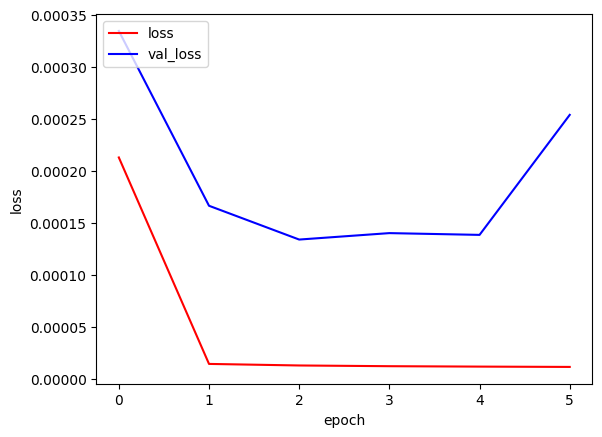

In [ ]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

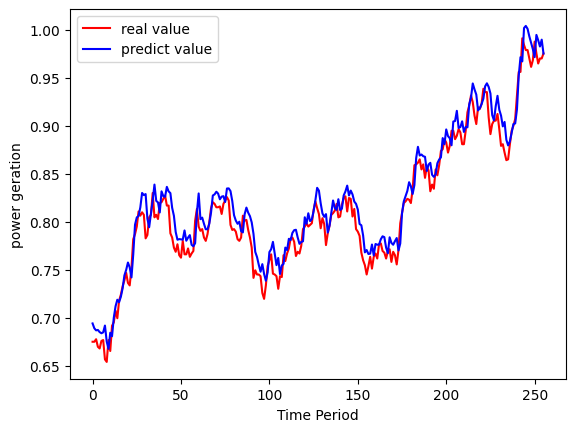

In [ ]:
plt.plot(y_test[1600 : ], 'r', label = "real value")
plt.plot(predict[1600 : ], 'b', label = "predict value")
plt.xlabel("Time Period")
plt.ylabel('power geration')
plt.legend(loc='upper left')
plt.show()